### Note

### Library

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# reads the FileName and returns a label which identifies the dataset
# label = [filename, day, month, chip, aq_flux, ol_flux, analysis]
def fn_reader(filename):
    
    # return a list of floated values from the text string
    import re
    def get_numbers_from_filename(filename):
        z = re.findall(r'\d+(?:\.\d+)?', filename)
        return [float(z[s]) for s in range(len(z))]
    
    
    chip = 'None'
    if (filename.find('A') != -1): 
        chip = 'A'
    if (filename.find('B') != -1): 
        chip = 'B'
    analysis = 'None'
    if (filename.find('i') != -1): 
        analysis  = 'I'
    if (filename.find('e') != -1): 
        analysis  = 'E'
    date_d = get_numbers_from_filename(filename)[0]
    date_m = get_numbers_from_filename(filename)[1]
    ol     = get_numbers_from_filename(filename)[2]
    aq     = get_numbers_from_filename(filename)[3]
    label  = [filename, date_d, date_m, chip, ol, aq, analysis]
        
    return label

In [82]:
# returns the vector of the mean values of the property "target" indexed by the label
def df_reader(label, target):
    
    values = []

    for i in np.arange(len(label)):       # runs through the files indexed by the label
        df = pd.read_csv(label[i][0])     # dataframe of the i° file
        indexNamesArr = df.index.values   # names of the rows of df
        
        for x in indexNamesArr:                  # runs through the rows of each dataframe
            if df.loc[x]['property'] == target:  # finds the row of the property "target"
                values.append(df.loc[x]['mean']) # gets the mean value of the property
                
    return values



### Importing data

In [83]:
# label = [filename, day, month, chip, aq_flux, ol_flux, analysis]
# label_E for electronic analysis
# label_I for image analysis

import glob, os
os.chdir("./")
label = [];
label_E = []
label_I = []
i = 0
for filename in glob.glob("*.csv"):
    label.append(fn_reader(filename))
    if (label[i][6] == 'E'):
        label_E.append(fn_reader(filename))
    if label[i][6] == 'I':
        label_I.append(fn_reader(filename))
    i = i+1

label_E = np.array(label_E)
label_I = np.array(label_I)

print ('Label_E:\n')
print(label_E)
print ('\n\n Label_I:\n')
print(label_I)

Label_E:

[['2-12_A-ol0.5-aq0.5_e.csv' '2.0' '12.0' 'A' '0.5' '0.5' 'E']
 ['2-12_B-ol10-aq10_e.csv' '2.0' '12.0' 'B' '10.0' '10.0' 'E']
 ['2-12_B-ol15-aq5_e.csv' '2.0' '12.0' 'B' '15.0' '5.0' 'E']
 ['2-12_B-ol2-aq2_e.csv' '2.0' '12.0' 'B' '2.0' '2.0' 'E']
 ['2-12_B-ol3-aq7_e.csv' '2.0' '12.0' 'B' '3.0' '7.0' 'E']
 ['2-12_B-ol30-aq10_e.csv' '2.0' '12.0' 'B' '30.0' '10.0' 'E']
 ['2-12_B-ol5-aq15_e.csv' '2.0' '12.0' 'B' '5.0' '15.0' 'E']
 ['2-12_B-ol5-aq5_e.csv' '2.0' '12.0' 'B' '5.0' '5.0' 'E']
 ['2-12_B-ol7-aq3_e.csv' '2.0' '12.0' 'B' '7.0' '3.0' 'E']]


 Label_I:

[['2-12_A-ol0.5-aq0.5_i.csv' '2.0' '12.0' 'A' '0.5' '0.5' 'I']
 ['2-12_A-ol2-aq2_i.csv' '2.0' '12.0' 'A' '2.0' '2.0' 'I']
 ['2-12_A-ol5-aq5_i.csv' '2.0' '12.0' 'A' '5.0' '5.0' 'I']
 ['2-12_B-ol10-aq10_i.csv' '2.0' '12.0' 'B' '10.0' '10.0' 'I']
 ['2-12_B-ol15-aq5_i.csv' '2.0' '12.0' 'B' '15.0' '5.0' 'I']
 ['2-12_B-ol2-aq2_i.csv' '2.0' '12.0' 'B' '2.0' '2.0' 'I']
 ['2-12_B-ol3-aq7_i.csv' '2.0' '12.0' 'B' '3.0' '7.0' 'I']
 ['2-1

### ratio size/distance vs ratio aq flux/ oil flux

               property      mean  mean std     sigma  sigma std
0       distance w [mm]  1.059666  0.006866  0.218100   0.006866
1       distance n [mm]  1.254990  0.007145  0.225758   0.007145
2       wavelength [mm]  2.253316  0.008406  0.252762   0.008406
3           size w [mm]  1.207421  0.009926  0.184841   0.009926
4           size n [mm]  1.009947  0.008700  0.187711   0.008699
5  meniscus size b [mm]  0.102872  0.000389  0.033605   0.000389
6  meniscus size f [mm]  0.073849  0.000672  0.028310   0.000672
7     velocity w [mm/s]  0.316939  0.004018  0.173666   0.004019
8     velocity n [mm/s]  0.316098  0.003649  0.181611   0.003651


NameError: name 'sd_ratio' is not defined

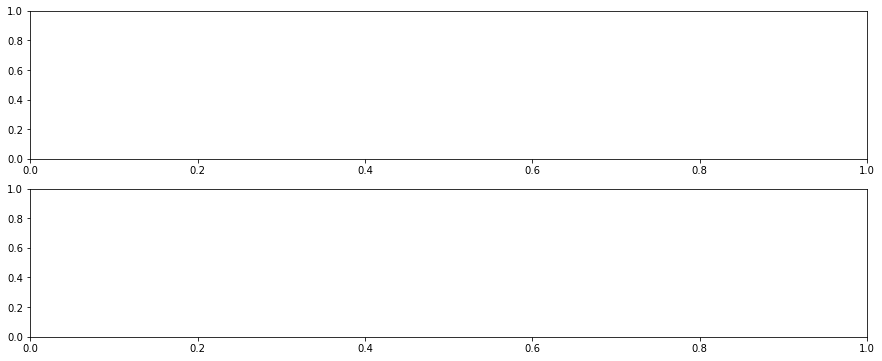

In [94]:
# fluxes
Flux_aq    = np.array(label_E[:,4]).astype(float)
Flux_ol    = np.array(label_E[:,5]).astype(float)
Flux_ratio = Flux_aq/Flux_ol
# sizes
size = df_reader(label_E, 'spatial size 1 [s]')
size = np.array(size)
# distances
dist = df_reader(label_E, 'spatial distance 1 [s]')
dist = np.array(dist)


#sd_ratio = size/dist

print(pd.read_csv(label_I[0][0]))

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
axs[0].plot(sd_ratio, Flux_ratio, color='blue', label= "signal 1")
axs[0].set_xlabel('size/distance')
axs[0].set_ylabel('flux ratio')
axs[1].plot(Flux_ratio, size, color='green', label= "signal 2")
axs[1].set_xlabel('flux ratio')
axs[1].set_ylabel('size/distance')

### wavelength (period) vs total flux

### fiber spatial size

### velocity 

### meniscus size